In [151]:
import sys
sys.path.append('./../../Dataset_custom/hoda')

In [152]:
from HodaDatasetReader import read_hoda_dataset
from scipy import io
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [153]:
# import data
x_train, y_train = read_hoda_dataset(dataset_path='./../../Dataset_custom/hoda/DigitDB/Train 60000.cdb')
x_test, y_test = read_hoda_dataset(dataset_path='./../../Dataset_custom/hoda/DigitDB/Test 20000.cdb')
x_val, y_val = read_hoda_dataset(dataset_path='./../../Dataset_custom/hoda/DigitDB/RemainingSamples.cdb')

In [154]:
x_train.shape

(60000, 32, 32, 1)

In [155]:
# reshape to siutable format
sampels_tr, hight_tr, width_tr, _ = x_train.shape
sampels_te, hight_te, width_te, _ = x_test.shape
sampels_va, hight_va, width_va, _ = x_val.shape
x_train = x_train.reshape(sampels_tr, hight_tr, width_tr)
x_test = x_test.reshape(sampels_te, hight_te, width_te)
x_val = x_val.reshape(sampels_va, hight_va, width_va)

In [156]:
# one-hot lables - Categorical cross entropy
# y_train = OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).toarray()
# y_test = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()
# y_val = OneHotEncoder().fit_transform(y_val.reshape(-1, 1)).toarray()

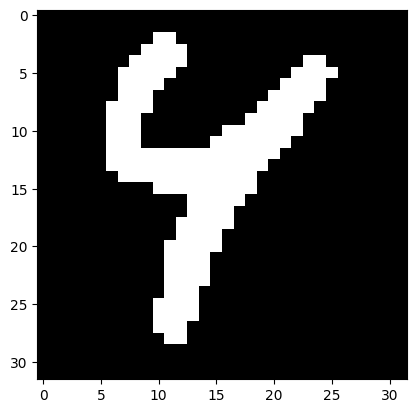

In [157]:
plt.imshow(x_train[0], cmap='gray')

In [158]:
x_train[0].shape

(32, 32)

In [159]:
# model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [160]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [161]:
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=64)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8697 - loss: 0.4435 - val_accuracy: 0.9561 - val_loss: 0.1425
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9763 - loss: 0.0853 - val_accuracy: 0.9527 - val_loss: 0.1516
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9821 - loss: 0.0626 - val_accuracy: 0.9679 - val_loss: 0.1119
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9862 - loss: 0.0463 - val_accuracy: 0.9679 - val_loss: 0.1069
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9880 - loss: 0.0403 - val_accuracy: 0.9704 - val_loss: 0.1005
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9899 - loss: 0.0322 - val_accuracy: 0.9657 - val_loss: 0.1301
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9893 - loss: 0.0316 - val_accuracy: 0.9676 - val_loss: 0.1332
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9919 - loss: 0.0266 - val_accuracy: 0.

In [162]:
model.evaluate(x_test, y_test, batch_size=64)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.1148


[0.13889339566230774, 0.9716500043869019]

In [163]:
df = pd.DataFrame(hist.history)

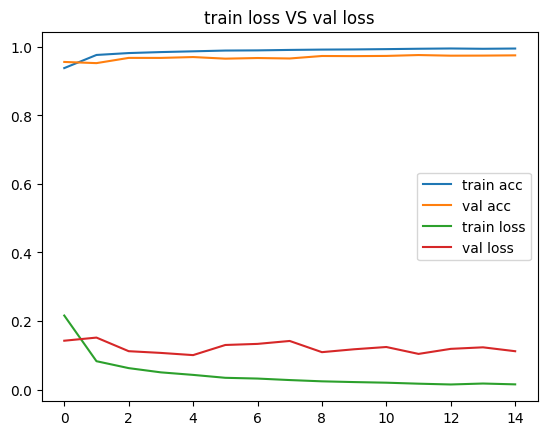

In [164]:
plt.plot(df['accuracy'], label='train acc')
plt.plot(df['val_accuracy'], label='val acc')
plt.title('train acc VS val acc')
plt.legend()
plt.plot(df['loss'], label='train loss')
plt.plot(df['val_loss'], label='val loss')
plt.title('train loss VS val loss')
plt.legend()